In [59]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Univariate linear regression

We will start with an example about univariate linear regression

In [60]:
def generate_data(n, w_true, b_true, sigma_true):
    x = np.random.rand(n)
    y = w_true*x + b_true + np.random.randn(n)*sigma_true
    return x, y

In [61]:
# Generate non-linear data
np.random.seed(1)
x = np.arange(-1, 1, 0.1).reshape(-1, 1)
y = 0.5*x + 2*x**2

In [62]:
# Plotting linear regression lines
def plot_lr(x=None, y=None, w=1, b=0, show_errors=False, show_mae=False, show_mse=False, show_boxes=False, ax=None):
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y)
    y_max = np.max(y)
    
    n = x.shape[0]
    
    ax = ax or plt.gca()
    ax.scatter(x, y)
    
    epsilon = 0.3
    ax.set_xlim(x_min-epsilon, x_max+epsilon)
    ax.set_ylim(y_min-epsilon, y_max+epsilon)
    
    x_plot = np.asarray([x_min,x_max])
    y_plot = w*x_plot + b
    
    ax.plot(x_plot, y_plot, c='black')
    
    abs_err = 0
    sq_err = 0
    
    if show_boxes:
        show_errors = False
    
    for i in range(len(x)):
        xi = x[i]
        yi = y[i]
        pred_y = w*xi + b
        if show_errors:
            ax.plot([xi, xi], [yi, pred_y], c='r')
        if show_boxes:
            diff = yi - pred_y
            ax.plot([xi, xi], [yi, pred_y], c='r')
            ax.plot([xi-diff, xi-diff], [yi, pred_y], c='r')
            ax.plot([xi-diff, xi], [yi, yi], c='r')
            ax.plot([xi-diff, xi], [pred_y, pred_y], c='r')
        abs_err += np.abs(yi - pred_y)
        sq_err +=  (yi - pred_y)**2
    if show_mae:
        print('Mean absolute error: %.3f' % (abs_err/n))
    if show_mse:
        print('Mean squared error: %.3f' % (sq_err/n))
        
    plt.gca().set_aspect('equal')
    plt.show()

In [63]:
# Generate data
np.random.seed(1)

# These are the parameters that guide data generating
w_true = 0.6 # Slope of the data-generating line
b_true = 0.2 # Intercept of the data generating line
sigma_true = np.sqrt(0.02) # Standard deviation of the noise (which is square root of the variance)
n_samples = 5 # Sample size

x, y = generate_data(n_samples, w_true, b_true, sigma_true)

Below you can change values of parameters $w$ (slope of the regression line) and $b$ (intercept of the regression line) and see how the values affect mean absolute and mean squared errors.

You can also change the parameters for the data-generating in the function above and try with different data sets. 

In [64]:
%matplotlib inline

from ipywidgets import interact, fixed

ww = widgets.FloatSlider(min=-5, max=5)
bb = widgets.FloatSlider(min=-1, max=1)
show_errors = widgets.Checkbox(description='Show error bars')
show_boxes = widgets.Checkbox(description='Show error boxes')
show_mae = widgets.Checkbox(description='Show mean absolute error')
show_mse = widgets.Checkbox(description='Show mean squared error')

interact(plot_lr, x=fixed(x), y=fixed(y), w=ww, b=bb, show_errors=show_errors, show_mae=show_mae, show_mse=show_mse, show_boxes=show_boxes, ax=fixed(None));

interactive(children=(FloatSlider(value=0.0, description='w', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

Next, we will find the optimal values for $w$ and $b$ by minimizing mean squared error

In [65]:
numerator = 0
denominator = 0

x_bar = np.mean(x)
y_bar = np.mean(y)

for i in range(len(y)):
    numerator += (x[i] - x_bar)*(y[i] - y_bar)
    denominator += (x[i] - x_bar)**2

w_hat = numerator/denominator
b_hat = y_bar - w_hat*x_bar

print('w=%f' % w_hat)
print('b=%f' % b_hat)

w=0.660381
b=0.039261


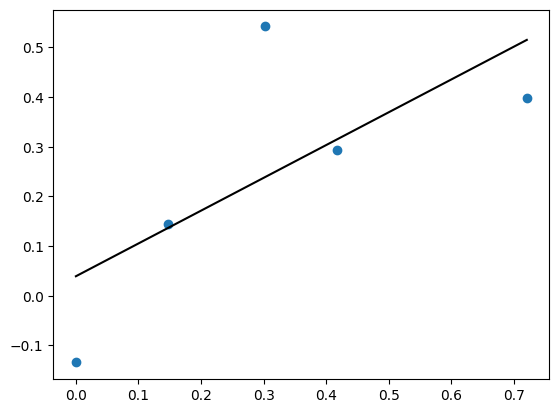

In [66]:
plt.scatter(x, y)

x_plot = np.asarray([np.min(x), np.max(x)])
y_plot = w_hat*x_plot + b_hat

plt.plot(x_plot, y_plot, c='black')
plt.show()

In [67]:
pred = w_hat*x + b_hat
mse = mean_squared_error(pred, y)

print('MSE: %.3f' % mse)

MSE: 0.027


## Multivariate linear regression

In [68]:
# Generate multivariate data
np.random.seed(1)
n_samples = 50
sigma = np.sqrt(0.5)

x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
X = np.matrix([np.ones(n_samples), x1, x2]).T # Design matrix

y = np.matrix(2*x1 + x2 + np.random.randn(n_samples)*sigma).T

In [69]:
def plot_lr_3d(x1=None, x2=None, y=None, w0=0, w1=0, w2=0, show_mae=False, show_mse=False, show_errors=False):
    x1_min = np.min(x1)
    x1_max = np.max(x1)
    x2_min = np.min(x2)
    x2_max = np.max(x2)
    y_min = np.min(y)
    y_max = np.max(y)
    
    n = x1.shape[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y, c='b', linewidths=3, alpha=1)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    
    epsilon = 0.1
    ax.set_xlim(x1_min-epsilon, x1_max+epsilon)
    ax.set_ylim(x2_min-epsilon, x2_max+epsilon)
    ax.set_zlim(y_min-epsilon, y_max+epsilon)
    
    p = np.linspace(0, 1, 11)

    xx1, xx2 = np.meshgrid(p, p)

    z = w0 + w1*xx1 + w2*xx2

    ax.plot_surface(xx1, xx2, z)
    
    abs_err = 0
    sq_err = 0
    
    for i in range(len(y)):
        x1i = x1[i]
        x2i = x2[i]
        yi = y[i]
        pred_y = w0 + w1*x1i + w2*x2i
        if show_errors:
            ax.plot([x1i, x1i], [x2i, x2i], [yi, pred_y], c='r')
        abs_err += np.abs(yi - pred_y)
        sq_err +=  (yi - pred_y)**2
        
    if show_mae:
        print('Mean absolute error: %.3f' % (abs_err/n))
    if show_mse:
        print('Mean squared error: %.3f' % (sq_err/n))
    
    plt.show()

In [70]:
%matplotlib notebook

ww0 = widgets.FloatSlider(min=-5, max=5)
ww1 = widgets.FloatSlider(min=-5, max=5)
ww2 = widgets.FloatSlider(min=-5, max=5)
show_errors = widgets.Checkbox(description='Show error bars')
show_mae = widgets.Checkbox(description='Show mean absolute error')
show_mse = widgets.Checkbox(description='Show mean squared error')

interact(plot_lr_3d, x1=fixed(x1), x2=fixed(x2), y=fixed(y), w0=ww0, w1=ww1, w2=ww2, show_errors=show_errors, show_mae=show_mae, show_mse=show_mse, ax=fixed(None));

interactive(children=(FloatSlider(value=0.0, description='w0', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

Let's fit the multivariate regression model

In [71]:
# Multiple the design matrix X with its transpose
XTX = X.T*X
XTX

matrix([[50.        , 23.34877998, 25.23901278],
        [23.34877998, 15.56307536, 12.16951311],
        [25.23901278, 12.16951311, 16.71188846]])

In [72]:
# Inverse XTX
XTX_inv = np.linalg.inv(XTX)
XTX_inv

matrix([[ 0.12199317, -0.09047334, -0.1183571 ],
        [-0.09047334,  0.21632224, -0.02088804],
        [-0.1183571 , -0.02088804,  0.2537962 ]])

In [73]:
# Check that inverse gives reasonable results
XTX*XTX_inv

matrix([[ 1.00000000e+00,  1.11022302e-16,  8.88178420e-16],
        [-2.22044605e-16,  1.00000000e+00,  0.00000000e+00],
        [-4.44089210e-16, -2.77555756e-16,  1.00000000e+00]])

In [74]:
# Compute the numerator
XTy = X.T*y
XTy

matrix([[73.76873626],
        [42.73466594],
        [40.28732601]])

In [75]:
# Compute the weights
w = XTX_inv*XTy
w

matrix([[0.36464293],
        [1.72883161],
        [0.60107268]])

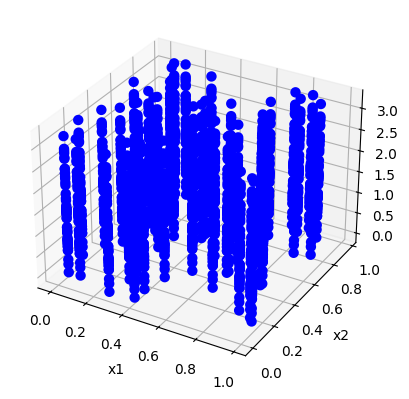

In [76]:
# Plot points
#%matplotlib notebook
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='b', linewidths=3, alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

In [77]:
# Plot the regression plane
p = np.linspace(0, 1, 11)

xx1, xx2 = np.meshgrid(p, p)

z = w[0, 0] + w[1, 0]*xx1 + w[2, 0]*xx2

ax.plot_surface(xx1, xx2, z)
plt.show()

In [78]:
# Plot error bars
for i in range(n_samples):
    z = w[0, 0] + w[1, 0]*X[i,1] + w[2, 0]*X[i,2]
    ax.plot3D([X[i,1], X[i, 1]], [X[i,2], X[i,2]], [y[i], z], c='r')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
# Predict a point
new_point = np.matrix([1, 0.5, 0.5]).T
y_pred = (w.T*new_point)[0, 0]
y_pred

In [ ]:
# Plot new point
ax.scatter(new_point[1], new_point[2], y_pred, c='g', linewidths=6, alpha=1)